# Churn Modelling Data modelling
#### Name : Sanjeev Patel

In [2]:
import pandas as pd 
import seaborn as sns
df = pd.read_excel("P3- Churn-Modelling Data.xlsx")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  churned          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churned            0
dtype: int64

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 1. Data Visualisation

##   Question 1: Customer Demographics

### a) What is the distribution of customers across different age groups?

In [10]:
age_group = df.groupby(['Age'])[['CustomerId']].count().reset_index().rename(columns={'CustomerId':'No. of Customers'})
age_group.head(3)

,Age,No. of Customers
0,18,22
1,19,27
2,20,40


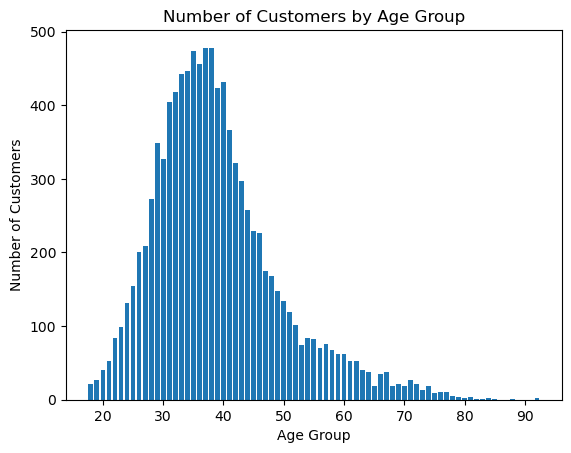

In [11]:
import matplotlib.pyplot as plt

plt.bar(age_group['Age'], age_group['No. of Customers'])
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age Group')

plt.show()

##### There are most number of customers whose age is around 35 to 45 

### b) Analyze the gender distribution of customers ?

<Axes: xlabel='Gender', ylabel='count'>

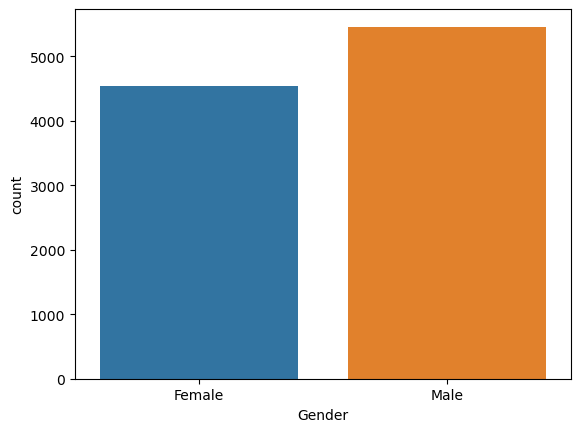

In [14]:
gender_group = df.groupby(['Gender'])[['CustomerId']].count().reset_index().rename(columns={'CustomerId':'No. of Customers'})
gender_group
sns.countplot(x = df['Gender'])

## Question 2: Churn Analysis

### a) What percentage of customers have churned?

In [17]:
df_churn = df['churned'].value_counts().reset_index()
df_churn

,churned,count
0,0,7963
1,1,2037


In [18]:
per_churned = (df_churn.iloc[1]['count'])*100/(df_churn.iloc[0]['count']+ df_churn.iloc[1]['count'])
print("Percentage of customers have churned is ", per_churned,"%")

Percentage of customers have churned is  20.37 %


<Axes: xlabel='churned', ylabel='count'>

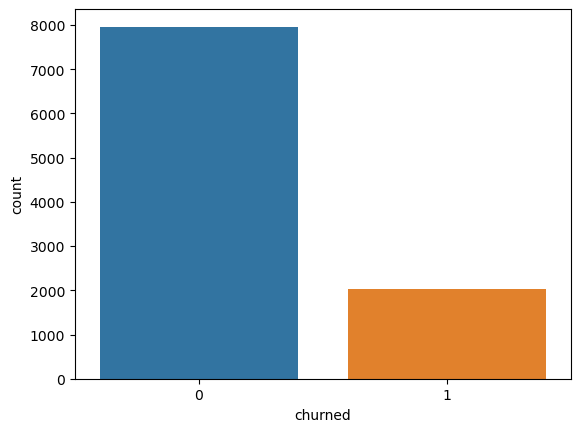

In [19]:
sns.countplot(x = df['churned'])

## Question 3: Product Usage

### a) What are the most commonly used products or services?

   NumOfProducts  count
0              1   5084
1              2   4590
2              3    266
3              4     60


<Axes: xlabel='NumOfProducts', ylabel='count'>

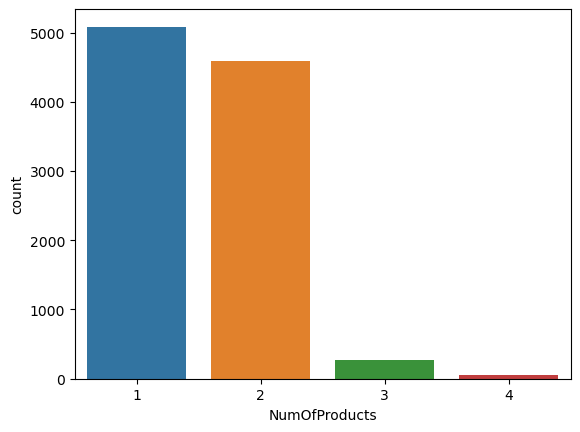

In [22]:
print(df['NumOfProducts'].value_counts().reset_index())
sns.countplot(x=df['NumOfProducts'])

Clearly most commonly used product is 1

### b) Analyze the usage patterns of different customer segments

FOR MALE 
    NumOfProducts  count
0              1   2788
1              2   2530
2              3    117
3              4     22
FOR FEMALE 
    NumOfProducts  count
0              1   2296
1              2   2060
2              3    149
3              4     38


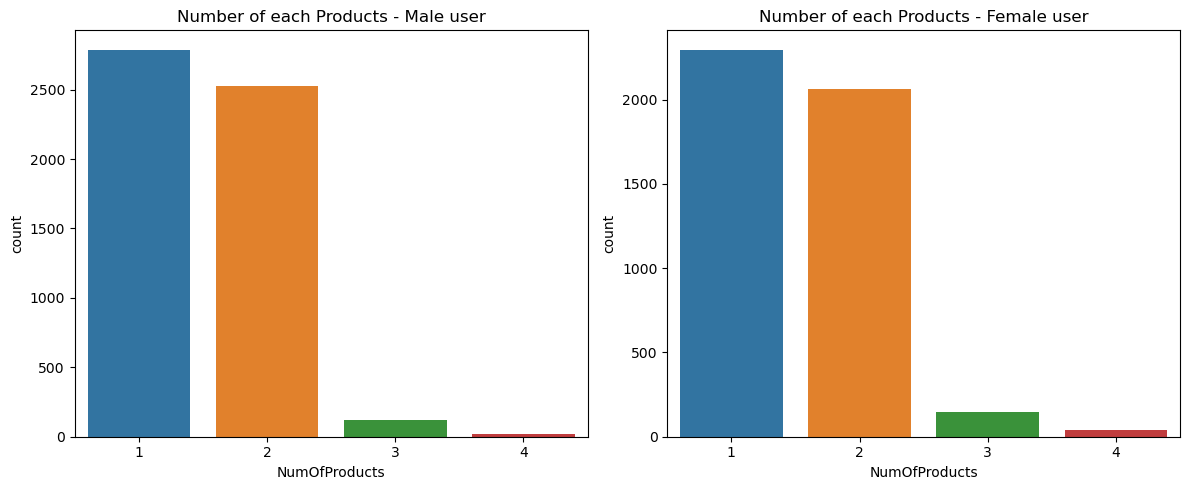

In [25]:
print('FOR MALE','\n',
      df[df['Gender'] == 'Male']['NumOfProducts'].value_counts().reset_index())
print('FOR FEMALE','\n',
      df[df['Gender'] == 'Female']['NumOfProducts'].value_counts().reset_index())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='NumOfProducts', data=df[df['Gender'] == 'Male'])
plt.title('Number of each Products - Male user')
plt.subplot(1, 2, 2)
sns.countplot(x='NumOfProducts', data=df[df['Gender'] == 'Female'])
plt.title('Number of each Products - Female user')
plt.tight_layout()
plt.show()

## Question 4: Financial Analysis

### a) What is the average account balance of customers?

In [28]:
print('Average account balance of customers is', df['Balance'].mean())

Average account balance of customers is 76485.889288


### b) Compare the financial characteristics of churned vs. non-churned customers

## Question 5: Predictive Modeling

# 2. Feature selection

In [32]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churned'],
      dtype='object')

#### Drop irrelevent feature like 'Surname' 'RowNumber'& 'CustomerID'

In [34]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis= 1)
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


#### Encoding of Categorical Data

In [36]:
df['Geography'].unique

<bound method Series.unique of 0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object>

##### We can convert the categorical values to numerical values just like France = 0, Spain =1 , Germany = 2, so that machine learning understand what we are trying to say but ....here,We will convert geograohy columns to binary vectors. Assigning numerical values to nominal categories (e.g., France = 0, Spain =1 , Germany = 2) would imply an order (France<Spain<Germany), which doesn't exist. so there is no relation between theses three. That's we will use binary vectors.
##### One-hot encoding ensures that each category is treated independently and on an equal footing.

In [38]:
df = pd.get_dummies(df,drop_first=True) ## Dropping first dummy to avoid dummy variable trap

In [39]:
df.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False


### 2(b) What are the main reasons for customer churn?

                    churned
churned            1.000000
Age                0.285323
Geography_Germany  0.173488
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Geography_Spain   -0.052667
Gender_Male       -0.106512
IsActiveMember    -0.156128


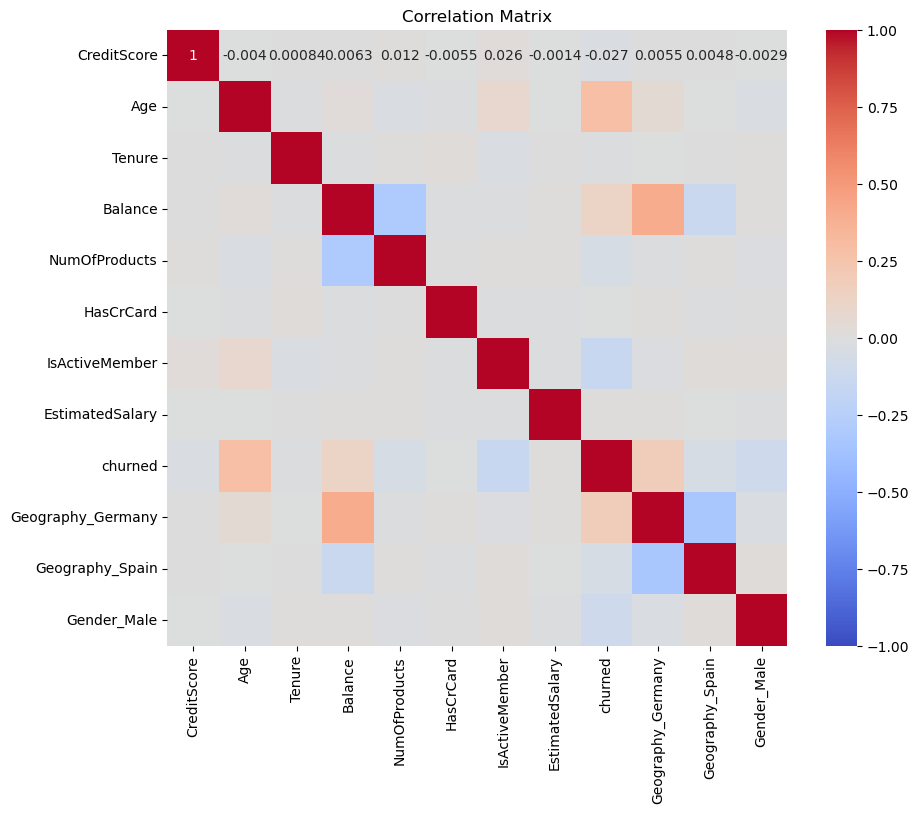

In [41]:
corr_matrix = df.corr()
churn_corr = corr_matrix[['churned']].sort_values(by='churned', ascending=False)
print(churn_corr)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

So, Churn is mostly dependent on Age, Balance, EstimatedSalary.

In [43]:
df_churn = df['churned'].value_counts().reset_index()
df_churn

,churned,count
0,0,7963
1,1,2037


# 3. Data Preprocessing
# Since, we have imbalance dataset

#### Let's define our Features(X) and Target variable(Y)

In [46]:
X = df.drop(['churned'],axis = 1)
y = df['churned']

In [47]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False


In [48]:
y.head(2)

0    1
1    0
Name: churned, dtype: int64

### Handling Imbalance dataset

#### 1. Oversampling Minority Class: Duplicate or generate synthetic examples of the minority class.
SMOTE (Synthetic Minority Over-sampling Technique): Generates synthetic samples by interpolating between existing minority samples.
#### 2. Undersampling Majority Class: Reduce the number of examples in the majority class to balance the dataset.
We will loose valuable data using 2nd method ,most commmonly used is SMOTE.
SMOTE uses k-nearest neighbors (typically k=5) to interploating between minority classes to increase its value_counts

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
X_res,y_res = SMOTE().fit_resample(X,y)
y_res.value_counts()

churned
1    7963
0    7963
Name: count, dtype: int64

## Split Test and Train Data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42) # We have already used SMOTE here so no need of stratify

#X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y) Since imbalance dataset stratify 
# Function to split the data in a way that preserves the proportion of each class in both the training and test sets. 

## Feature scaling 
Important for ML models like KNN, Neural network, SVM, linear regression and Logistic regression 
to calculate distances between data points

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc = StandardScaler()

In [59]:
X_train = sc.fit_transform(X_train) ## Need to put the dataset in same scale std(when follows gaussian districutioon),norm (not gaussian)
X_test = sc.transform(X_test)

## Logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
log = LogisticRegression()

In [63]:
y_train.shape

(12740,)

In [64]:
log.fit(X_train,y_train)

LogisticRegression()

In [65]:
y_pred = log.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(y_test,y_pred) # can't use accuracy in imbalance dataset for metrics

0.770872567482737

In [68]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [69]:
precision_score(y_test,y_pred)

0.7626037013401404

In [70]:
recall_score(y_test,y_pred)

0.7694784288473921

In [71]:
f1_score(y_test,y_pred)

0.7660256410256411

Accuracy , precsion ,recall, f1score have been improved alot after using smote to balance the data

## SVC

In [74]:
from sklearn import svm

In [75]:
svm = svm.SVC()

In [76]:
svm.fit(X_train,y_train)

SVC()

In [77]:
y_pred2 = svm.predict(X_test)

In [78]:
accuracy_score(y_test,y_pred2)

0.834902699309479

In [79]:
precision_score(y_test,y_pred2)

0.838943894389439

In [80]:
recall_score(y_test,y_pred2)

0.8184159690920798

In [81]:
f1_score(y_test,y_pred2)

0.8285528031290743

## K-neighbors classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
KNN = KNeighborsClassifier()

In [85]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [86]:
y_pred3 = KNN.predict(X_test)

In [87]:
accuracy_score(y_test,y_pred3)

0.8138731952291274

In [88]:
precision_score(y_test,y_pred3)

0.7973977695167286

In [89]:
recall_score(y_test,y_pred3)

0.8287186091435931

In [90]:
f1_score(y_test,y_pred3)

0.8127565519419009

## Decision Tree classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
Dtc = DecisionTreeClassifier()

In [94]:
Dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [95]:
y_pred4 = Dtc.predict(X_test)

In [96]:
accuracy_score(y_test,y_pred4)

0.8091650973006905

In [97]:
precision_score(y_test,y_pred4)

0.7958672510958046

In [98]:
recall_score(y_test,y_pred4)

0.8184159690920798

In [99]:
f1_score(y_test,y_pred4)

0.806984126984127

## Random Forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rdf = RandomForestClassifier()

In [103]:
rdf.fit(X_train,y_train)

RandomForestClassifier()

In [104]:
y_pred5 = rdf.predict(X_test)

In [105]:
accuracy_score(y_test,y_pred5)

0.8697426239799121

In [106]:
precision_score(y_test,y_pred5)

0.8675710594315246

In [107]:
recall_score(y_test,y_pred5)

0.8647778493238892

In [108]:
f1_score(y_test,y_pred5)

0.8661722025153177

## Gradient Boosting Classfier

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

In [111]:
grd = GradientBoostingClassifier()

In [112]:
grd.fit(X_train,y_train)

GradientBoostingClassifier()

In [113]:
y_pred6 = grd.predict(X_test)

In [114]:
accuracy_score(y_test,y_pred6)

0.837413684871312

In [115]:
precision_score(y_test,y_pred6)

0.8397898883782009

In [116]:
recall_score(y_test,y_pred6)

0.8235672891178365

In [117]:
f1_score(y_test,y_pred6)

0.8315994798439532

## All models results

In [119]:
final_results = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF ','GB'],
                              'Accuracy': [accuracy_score(y_test,y_pred),
                                           accuracy_score(y_test,y_pred2),
                                           accuracy_score(y_test,y_pred3),
                                           accuracy_score(y_test,y_pred4),
                                           accuracy_score(y_test,y_pred5),
                                           accuracy_score(y_test,y_pred6) ]
                             })

In [120]:
final_results

,Models,Accuracy
0,LR,0.770873
1,SVC,0.834903
2,KNN,0.813873
3,DT,0.809165
4,RF,0.869743
5,GB,0.837414


<Axes: xlabel='Models', ylabel='Accuracy'>

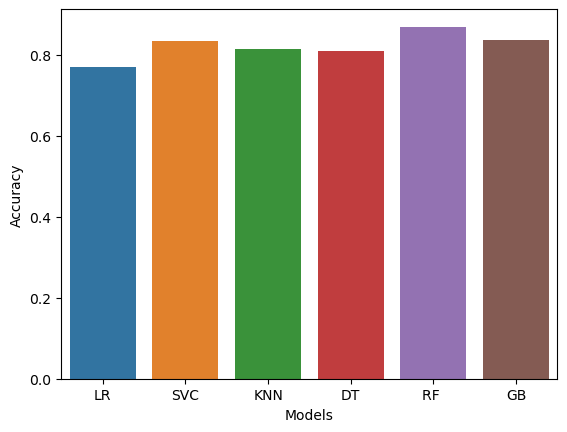

In [121]:
sns.barplot(x='Models', y='Accuracy', data=final_results)

In [122]:
final_results2 = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF ','GB'],
                              'Precision': [precision_score(y_test,y_pred),
                                           precision_score(y_test,y_pred2),
                                           precision_score(y_test,y_pred3),
                                           precision_score(y_test,y_pred4),
                                           precision_score(y_test,y_pred5),
                                           precision_score(y_test,y_pred6) ]
                             })

<Axes: xlabel='Models', ylabel='Precision'>

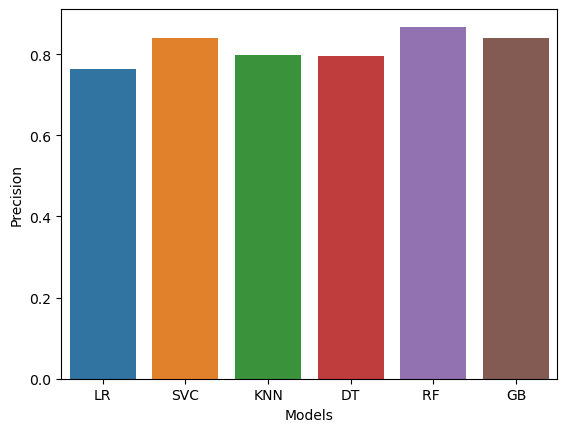

In [123]:
sns.barplot(x='Models', y='Precision', data=final_results2)

## Results - Random Forest is best model for our dataset

In [125]:
X_res = sc.fit_transform(X_res) # We are training the dataset on SMOTE data X_res,Y_res instead of X_train 

In [126]:
rdf.fit(X_res,y_res)

RandomForestClassifier()

In [127]:
import joblib

In [128]:
joblib.dump(rdf,"Churn model prediction")

['Churn model prediction']

In [129]:
model = joblib.load('Churn model prediction')

In [130]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [131]:
model.predict([[934, 34, 5, 1123233, 1, 1,
       1, 450050000,1,
       0, 0]])

array([0])

So, Customer have not churned 